# Import Libraries

In [2]:
import numpy as np
import pandas as pd
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Read CSV and get shape and head of the dataset

In [3]:
#Read Data
df=pd.read_csv("news.csv")

#Get shape and head
df.shape
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


# Check for Duplicates

In [6]:
df.duplicated().sum()

0

# Check for missing data

In [8]:
df.isna().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

# Get the labels

In [4]:
labels = df.label
labels.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

# Split the dataset

In [9]:
x_train,x_test,y_train,y_test = train_test_split(df['text'] , labels, test_size=0.2, random_state=7)

# Initialize a TfidfVectorizer

In [10]:
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)

# Fit and transform train set, transform test set


In [11]:
tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_test=tfidf_vectorizer.transform(x_test)

# Initialize a PassiveAggressiveClassifier

In [12]:
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train,y_train)

PassiveAggressiveClassifier(max_iter=50)

# Predict on the test set and calculate accuracy

In [13]:
y_pred=pac.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 92.9%


# Build confusion matrix

In [16]:
cm = confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])
cm

array([[588,  50],
       [ 40, 589]], dtype=int64)

# Plot Confusion matrix

In [14]:
from matplotlib import pyplot as plt
import seaborn as sns

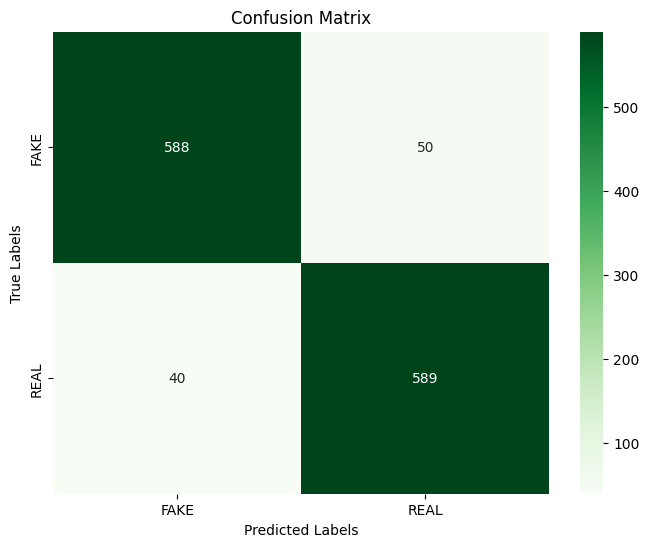

In [19]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=['FAKE', 'REAL'], yticklabels=['FAKE', 'REAL'])

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Display the plot
plt.show()

